In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e7/sample_submission.csv
/kaggle/input/playground-series-s5e7/train.csv
/kaggle/input/playground-series-s5e7/test.csv


In [2]:
df=pd.read_csv("/kaggle/input/playground-series-s5e7/train.csv")
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


id  Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
0   0               0.0         No                      6.0            4.0   
1   1               1.0         No                      7.0            3.0   
2   2               6.0        Yes                      1.0            0.0   
3   3               3.0         No                      7.0            3.0   
4   4               1.0         No                      4.0            4.0   

  Drained_after_socializing  Friends_circle_size  Post_frequency Personality  
0                        No                 15.0             5.0   Extrovert  
1                        No                 10.0             8.0   Extrovert  
2                       NaN                  3.0             0.0   Introvert  
3                        No                 11.0             5.0   Extrovert  
4                        No                 13.0             NaN   Extrovert

In [3]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()

encoded=encoder.fit_transform(df["Stage_fear"])
df["Stage_fear"]=encoded

encoder2=LabelEncoder()
encoded2=encoder2.fit_transform(df["Drained_after_socializing"])
df["Drained_after_socializing"]=encoded2

encoder3=LabelEncoder()
encoded3=encoder3.fit_transform(df["Personality"])
df["Personality"]=encoded3

df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


id  Time_spent_Alone  Stage_fear  Social_event_attendance  Going_outside  \
0   0               0.0           0                      6.0            4.0   
1   1               1.0           0                      7.0            3.0   
2   2               6.0           1                      1.0            0.0   
3   3               3.0           0                      7.0            3.0   
4   4               1.0           0                      4.0            4.0   

   Drained_after_socializing  Friends_circle_size  Post_frequency  Personality  
0                          0                 15.0             5.0            0  
1                          0                 10.0             8.0            0  
2                          2                  3.0             0.0            1  
3                          0                 11.0             5.0            0  
4                          0                 13.0             NaN            0

In [4]:
df["Time_spent_Alone"] = df["Time_spent_Alone"].fillna(df["Time_spent_Alone"].mean())
df["Social_event_attendance"] = df["Social_event_attendance"].fillna(df["Social_event_attendance"].mean())
df["Going_outside"] = df["Going_outside"].fillna(df["Going_outside"].mean())
df["Friends_circle_size"] = df["Friends_circle_size"].fillna(df["Friends_circle_size"].mean())
df["Post_frequency"] = df["Post_frequency"].fillna(df["Post_frequency"].mean())

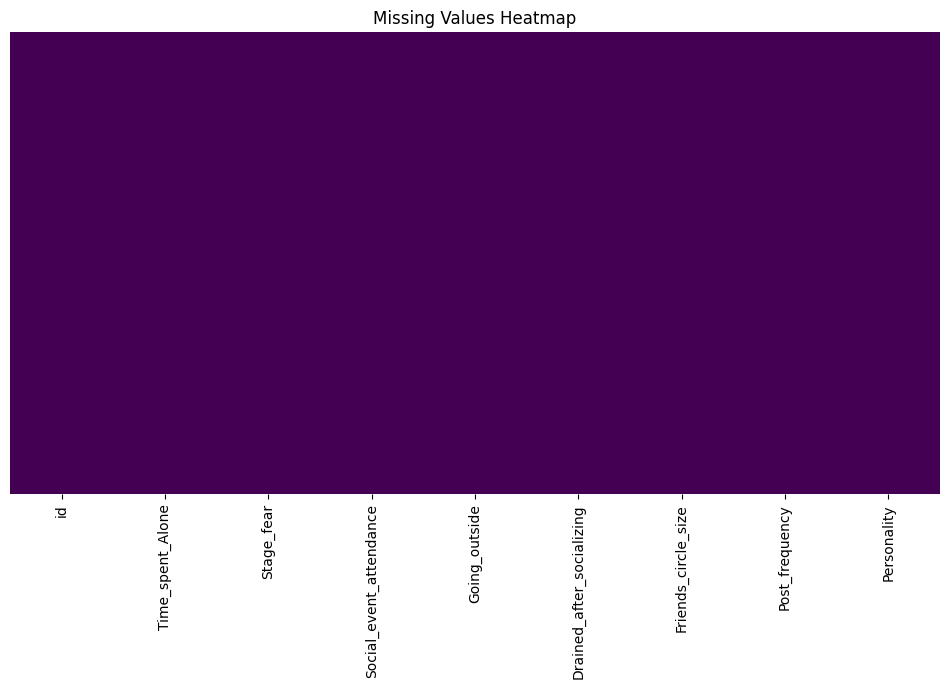

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

In [6]:
X=df.drop("Personality",axis=1)
y=df["Personality"]

In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=42,test_size=0.2)

In [8]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression(max_iter=2000)

model.fit(X_train,y_train)

LogisticRegression(max_iter=2000)

In [9]:
model.score(X_test,y_test)

0.968421052631579

**+++++++++++++++++++++++++++++++++++++++++++++++TEST++++++++++++++++++++++++++++++++++++++++++++++**

In [10]:
df=pd.read_csv("/kaggle/input/playground-series-s5e7/test.csv")
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


id  Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
0  18524               3.0         No                      7.0            4.0   
1  18525               NaN        Yes                      0.0            0.0   
2  18526               3.0         No                      5.0            6.0   
3  18527               3.0         No                      4.0            4.0   
4  18528               9.0        Yes                      1.0            2.0   

  Drained_after_socializing  Friends_circle_size  Post_frequency  
0                        No                  6.0             NaN  
1                       Yes                  5.0             1.0  
2                        No                 15.0             9.0  
3                        No                  5.0             6.0  
4                       Yes                  1.0             1.0

In [11]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()

encoded=encoder.fit_transform(df["Stage_fear"])
df["Stage_fear"]=encoded

encoder2=LabelEncoder()
encoded2=encoder2.fit_transform(df["Drained_after_socializing"])
df["Drained_after_socializing"]=encoded2

df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


id  Time_spent_Alone  Stage_fear  Social_event_attendance  \
0  18524               3.0           0                      7.0   
1  18525               NaN           1                      0.0   
2  18526               3.0           0                      5.0   
3  18527               3.0           0                      4.0   
4  18528               9.0           1                      1.0   

   Going_outside  Drained_after_socializing  Friends_circle_size  \
0            4.0                          0                  6.0   
1            0.0                          1                  5.0   
2            6.0                          0                 15.0   
3            4.0                          0                  5.0   
4            2.0                          1                  1.0   

   Post_frequency  
0             NaN  
1             1.0  
2             9.0  
3             6.0  
4             1.0

In [12]:
df["Time_spent_Alone"] = df["Time_spent_Alone"].fillna(df["Time_spent_Alone"].mean())
df["Social_event_attendance"] = df["Social_event_attendance"].fillna(df["Social_event_attendance"].mean())
df["Going_outside"] = df["Going_outside"].fillna(df["Going_outside"].mean())
df["Friends_circle_size"] = df["Friends_circle_size"].fillna(df["Friends_circle_size"].mean())
df["Post_frequency"] = df["Post_frequency"].fillna(df["Post_frequency"].mean())

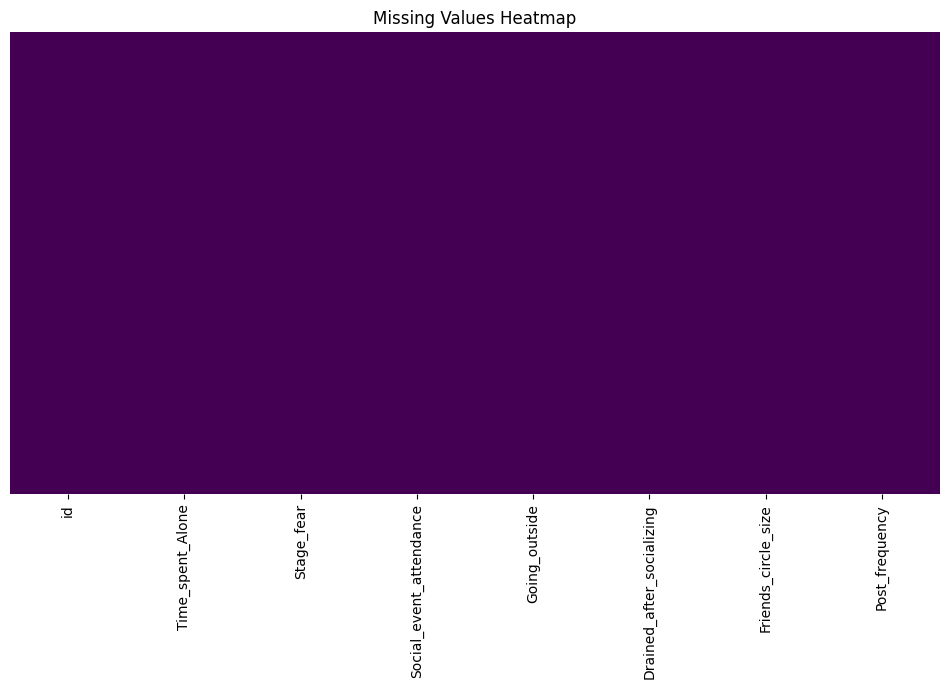

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

In [14]:
X=df

In [15]:
predictions=model.predict(X)
print(predictions)

[0 1 0 ... 0 0 1]


In [16]:
predictions=encoder3.inverse_transform(predictions)
print(predictions)

['Extrovert' 'Introvert' 'Extrovert' ... 'Extrovert' 'Extrovert'
 'Introvert']


In [17]:
submission = pd.DataFrame({
    "id": df["id"],
    "Personality": predictions
})

In [18]:
submission.to_csv("result.csv",index=False)